### **FlexML:** Regression Experiment with California House Value Prediction Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

from flexml import Regression
from sklearn.datasets import fetch_california_housing

In [2]:
df = fetch_california_housing(as_frame = True)['frame']

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
"""
* experiment_size: default is quick, quick (uses almost half amount of the available ml models), wide (Uses all available ml models)
* test_size: default is 0.25
* eval_metric: default is "r2", other options are "mae", "mse", "rmse"
"""
reg_exp = Regression(data=df, target_col="MedHouseVal", experiment_size="quick", test_size=0.25)
reg_exp.start_experiment(eval_metric="rmse")

INFO | 2024-09-01 20:03:14 | [PROCESS] Training the ML models
100%|██████████| 6/6 [00:09<00:00,  1.61s/it]
INFO | 2024-09-01 20:03:23 | [PROCESS] Model training is finished!


,model_name,r2,mae,mse,rmse
0,CatBoostRegressor,0.849800,0.292900,0.198800,0.445900
1,LGBMRegressor,0.838800,0.308500,0.213300,0.461800
2,XGBRegressor,0.836700,0.305400,0.216100,0.464900
3,RandomForestRegressor,0.808500,0.329200,0.253500,0.503500
4,DecisionTreeRegressor,0.595800,0.468600,0.534900,0.731400
5,LinearRegression,0.591100,0.529700,0.541100,0.735600


In [6]:
# You can also display the model stats after the experiment is done with a desired evaluation metric, default is "r2"
reg_exp.show_model_stats(eval_metric="r2")

,model_name,r2,mae,mse,rmse
0,CatBoostRegressor,0.849800,0.292900,0.198800,0.445900
1,LGBMRegressor,0.838800,0.308500,0.213300,0.461800
2,XGBRegressor,0.836700,0.305400,0.216100,0.464900
3,RandomForestRegressor,0.808500,0.329200,0.253500,0.503500
4,DecisionTreeRegressor,0.595800,0.468600,0.534900,0.731400
5,LinearRegression,0.591100,0.529700,0.541100,0.735600


In [7]:
"""
* You can get the best model(s) by calling get_best_models() method
    - top_n_models: default is 1, If you want to get only one model, you will get a model object, else
    - you will get a list of model objects
* By default, get_best_models() function returns the best model(s) based on the evaluation metric used in the start_experiment()
* But you can reorder the models by passing eval_metric parameter to get_best_models()
"""
best_model = reg_exp.get_best_models(top_n_models=1)

# Optionally, you can get the any model object by "model_name" value in the show_model_stats() output
example_model = reg_exp.get_model_by_name("RandomForestRegressor")

In [8]:
print(best_model)

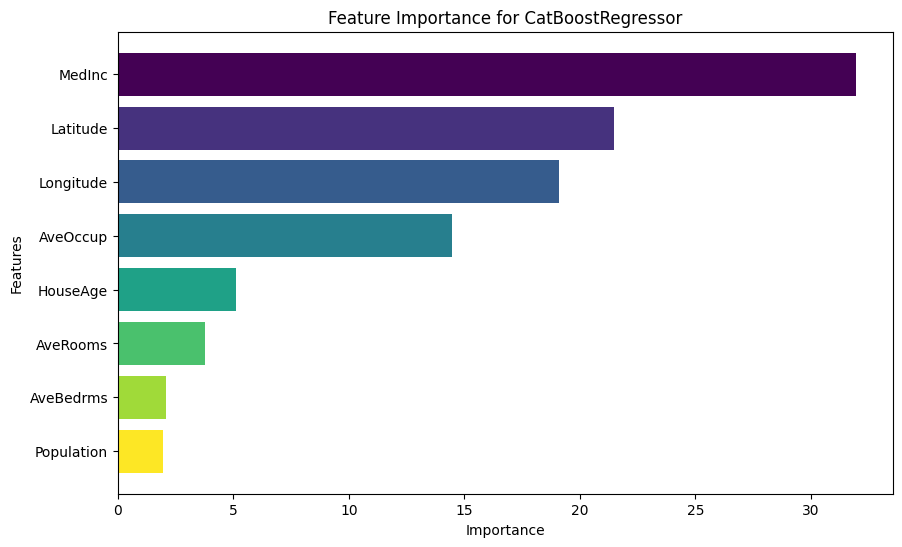

In [9]:
# Plot the feature importance of a model by passing the model object
# Default is the best model found in the experiment
reg_exp.plot_feature_importance()

In [10]:
"""
* model: model object that you want to tune
* tuning_method: default is randomized_search, also grid_search, randomized_search or optuna can be used
* n_trials: default is 10
* cv: default is 3 and It can be minimum 2
"""

reg_exp.tune_model(model=best_model, tuning_method="randomized_search", tuning_size="quick", n_iter=4, cv=3)

INFO | 2024-09-01 20:03:24 | [PROCESS] Model Tuning process is started


Fitting 3 folds for each of 4 candidates, totalling 12 fits


,model_name,r2,mae,mse,rmse
0,CatBoostRegressor_(randomized_search(quick))_(cv=3)_(n_iter=4),0.852800,0.289700,0.194700,0.441200
1,CatBoostRegressor,0.849800,0.292900,0.198800,0.445900
2,LGBMRegressor,0.838800,0.308500,0.213300,0.461800
3,XGBRegressor,0.836700,0.305400,0.216100,0.464900
4,RandomForestRegressor,0.808500,0.329200,0.253500,0.503500
5,DecisionTreeRegressor,0.595800,0.468600,0.534900,0.731400
6,LinearRegression,0.591100,0.529700,0.541100,0.735600


INFO | 2024-09-01 20:03:31 | [PROCESS] Model Tuning process is finished


In [11]:
# Access to the tuned model

## Option 1: Get the last tuned model object
tuned_model_option_1 = reg_exp.tuned_model

## Option 2: Get it by model name
tuned_model_option_2 = reg_exp.get_model_by_name("CatBoostRegressor_(randomized_search(quick))_(cv=3)_(n_iter=4)")

In [12]:
tuned_model_option_2

In [ ]:
# Save the model

## Option 1: Save the best model
reg_exp.save_model()

## Option 2: Save the selected model
reg_exp.save_model(tuned_model_option_1)